In [ ]:
#BAX 452 Homework 4 
#Group 10: Avantika Goyal, Shalagha Mundepi, Zexiang (Charles) Wang

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.linear_model import LassoCV, LogisticRegressionCV, LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import operator


## Question 1 - Exploratory Data Analysis (EDA) 

In [50]:
# Load the datasets
medical_data = pd.read_csv('C:/Users/shala/Downloads/ozempic/longyear-obese-hypertensive-40-57-medical-SMALL-sample.csv')
scripts_data = pd.read_csv('C:/Users/shala/Downloads/ozempic/longyear-obese-hypertensive-40-75-scripts-SMALL-sample.csv')

#View data
medical_data.info()
scripts_data.info()


C:\Users\shala\AppData\Local\Temp\ipykernel_10316\2498724651.py:3: DtypeWarning: Columns (9,10,29,43) have mixed types. Specify dtype option on import or set low_memory=False.
  scripts_data = pd.read_csv('C:/Users/shala/Downloads/ozempic/longyear-obese-hypertensive-40-75-scripts-SMALL-sample.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623525 entries, 0 to 623524
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   journey_id         623525 non-null  object 
 1   episode_id         623525 non-null  object 
 2   visit_id           621650 non-null  object 
 3   encounter_id       623525 non-null  object 
 4   claim_date         623525 non-null  object 
 5   patient_state      623525 non-null  object 
 6   patient_short_zip  623512 non-null  float64
 7   patient_age        616980 non-null  float64
 8   patient_gender     623393 non-null  object 
 9   place_of_service   484555 non-null  object 
 10  visit_type         600454 non-null  object 
 11  payor              608936 non-null  object 
 12  payor_channel      586086 non-null  object 
 13  ref_npi            297501 non-null  float64
 14  hcp_npi            434653 non-null  float64
 15  hcp_taxonomy       428209 non-null  object 
 16  hc

In [51]:
#Filter out the procedure code "J3490," which corresponds to Ozempic, a medication administered in healthcare settings. 
filtered_oz = medical_data[medical_data['proc_code'] == "J3490"]
filtered_oz.info() #check the information about the filtered data.

<class 'pandas.core.frame.DataFrame'>
Index: 772 entries, 216 to 622748
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   journey_id         772 non-null    object 
 1   episode_id         772 non-null    object 
 2   visit_id           772 non-null    object 
 3   encounter_id       772 non-null    object 
 4   claim_date         772 non-null    object 
 5   patient_state      772 non-null    object 
 6   patient_short_zip  772 non-null    float64
 7   patient_age        750 non-null    float64
 8   patient_gender     772 non-null    object 
 9   place_of_service   203 non-null    object 
 10  visit_type         752 non-null    object 
 11  payor              749 non-null    object 
 12  payor_channel      729 non-null    object 
 13  ref_npi            171 non-null    float64
 14  hcp_npi            660 non-null    float64
 15  hcp_taxonomy       658 non-null    object 
 16  hcp_specialty      658 non

('I10', 249)
('E11', 229)
('E78', 139)
('N18', 100)
('I25', 91)
('M54', 81)
('E66', 75)
('Z79', 72)
('R07', 71)
('Z51', 64)
('I48', 56)
('J45', 50)
('G89', 49)
('M19', 46)
('M25', 44)
('R10', 44)
('D68', 40)
('F41', 37)
('Z99', 36)
('K21', 35)
('H25', 34)
('Z68', 34)
('J44', 33)
('Z30', 33)
('M17', 32)
('M47', 28)
('C50', 28)
('D50', 27)
('M79', 27)
('Z87', 26)
('Z88', 25)
('N25', 25)
('R51', 24)
('G47', 23)
('E03', 23)
('M48', 22)
('F33', 22)
('R06', 20)
('R94', 20)
('Z85', 19)
('Z20', 19)
('J20', 19)
('F17', 19)
('I50', 18)
('K29', 18)
('F32', 18)
('Z86', 17)
('M51', 17)
('I12', 17)
('R11', 16)
('M70', 16)
('N20', 16)
('I11', 16)
('K57', 15)
('K44', 15)
('K59', 15)
('C61', 15)
('Z90', 15)
('N13', 15)
('I49', 14)
('Z11', 14)
('Z01', 14)
('D63', 14)
('F31', 14)
('L02', 14)
('G43', 12)
('K80', 12)
('M16', 12)
('D64', 12)
('R05', 12)
('J30', 12)
('R26', 12)
('H40', 12)
('K43', 12)
('R19', 12)
('N39', 12)
('K40', 12)
('R52', 12)
('Z95', 11)
('C77', 11)
('D25', 11)
('N95', 11)
('T85', 11)


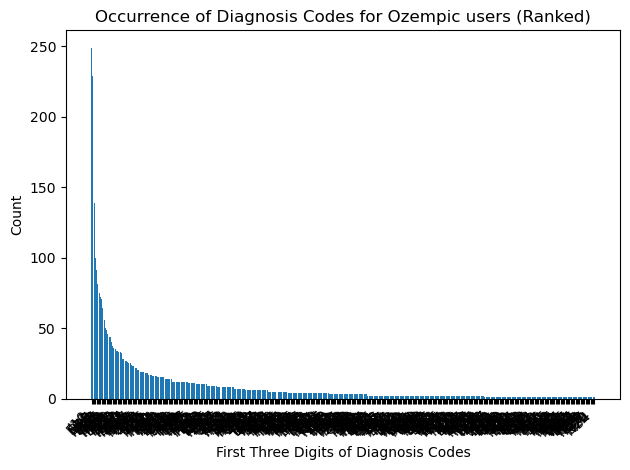

The top 3 most frequently used ICD-10-CM codes for diagnosis among Ozempic users are: I10, E11, E78.
I10 represents Hypertensive diseases, the most common diagnosis.
E11 indicates Type 2 diabetes mellitus, the second most frequent diagnosis.
E78 corresponds to disorders of lipoprotein metabolism and other lipidemias, the third most prevalent diagnosis.


In [52]:
# EDA: Identify the most frequently used ICD-10-CM codes for diagnosis among Ozempic users

# Select 'diag_' columns for diagnosis from 1 to 5
diag_columns = [col for col in filtered_oz.columns if col.startswith('diag_')]
df_diag = filtered_oz[diag_columns]

# Combine values from all diagnosis columns
combined_list = df_diag.values.flatten().tolist()
combined_list = [x for x in combined_list if pd.notna(x)]

# Process the first three digits of each diagnosis code and count their occurrences
first_three_counts = {}
for diag_code in combined_list:
    first_three = diag_code[:3]
    first_three_counts[first_three] = first_three_counts.get(first_three, 0) + 1

# Sort the counts in descending order
sorted_counts = sorted(first_three_counts.items(), key=operator.itemgetter(1), reverse=True)

# Print the sorted counts
for items in sorted_counts:
    print(items)

# Visualization: Bar chart of the top ICD-10-CM codes for diagnosis among Ozempic users

# Extract labels and values for plotting
labels = [item[0] for item in sorted_counts]
values = [item[1] for item in sorted_counts]

# Create the bar chart
plt.bar(labels, values)

# Set labels and title
plt.xlabel("First Three Digits of Diagnosis Codes")
plt.ylabel("Count")
plt.title("Occurrence of Diagnosis Codes for Ozempic users (Ranked)")

# Rotate x labels if they are long or overlapping
if len(labels) > 5:  
    plt.xticks(rotation=45, ha='right')  

# Adjust layout for better display
plt.tight_layout()

# Show the plot
plt.show()

# Print the interpretation of the visualization
print("The top 3 most frequently used ICD-10-CM codes for diagnosis among Ozempic users are: I10, E11, E78.")
print("I10 represents Hypertensive diseases, the most common diagnosis.")
print("E11 indicates Type 2 diabetes mellitus, the second most frequent diagnosis.")
print("E78 corresponds to disorders of lipoprotein metabolism and other lipidemias, the third most prevalent diagnosis.")


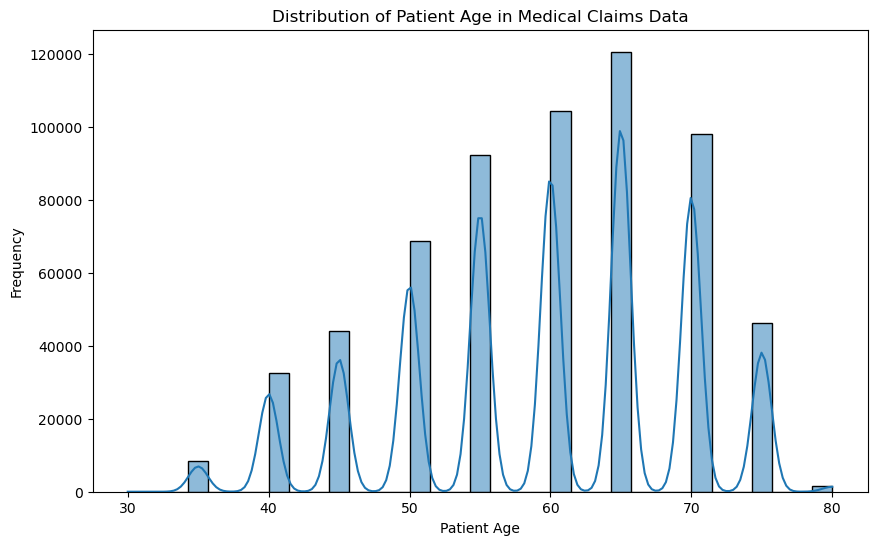

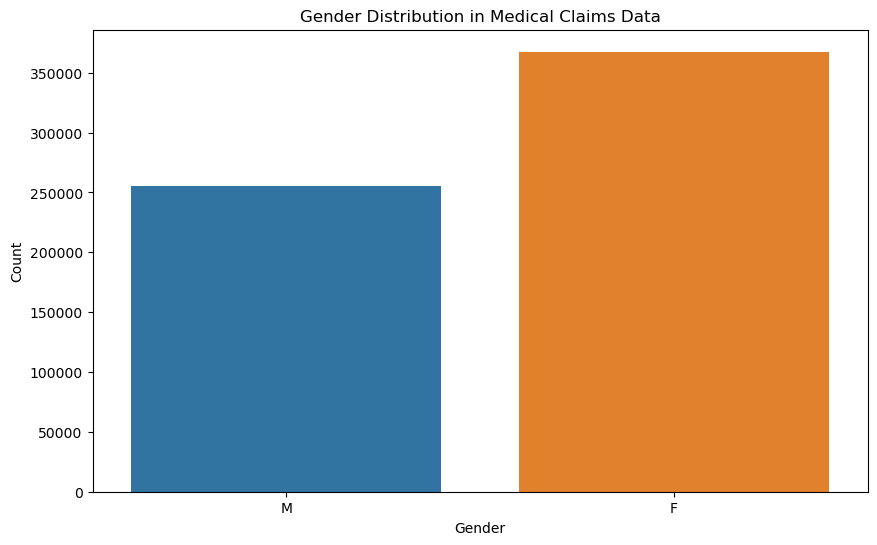

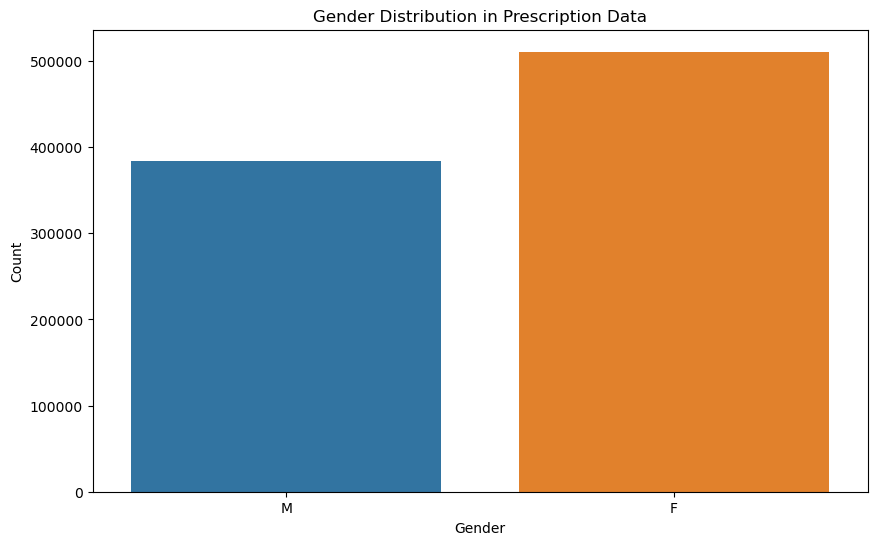

In [25]:
# Visualizations
# Visualization 1: Patient Age Distribution in Medical Claims Data
plt.figure(figsize=(10, 6))
sns.histplot(medical_data['patient_age'].dropna(), bins=35, kde=True)
plt.title('Distribution of Patient Age in Medical Claims Data')
plt.xlabel('Patient Age')
plt.ylabel('Frequency')
plt.show()

# Visualization 2: Gender Distribution in Medical Claims Data
plt.figure(figsize=(10, 6))
sns.countplot(x='patient_gender', data=medical_data)
plt.title('Gender Distribution in Medical Claims Data')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Visualization 3: Gender Distribution in Prescription Data
plt.figure(figsize=(10, 6))
sns.countplot(x='patient_gender', data=scripts_data)
plt.title('Gender Distribution in Prescription Data')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


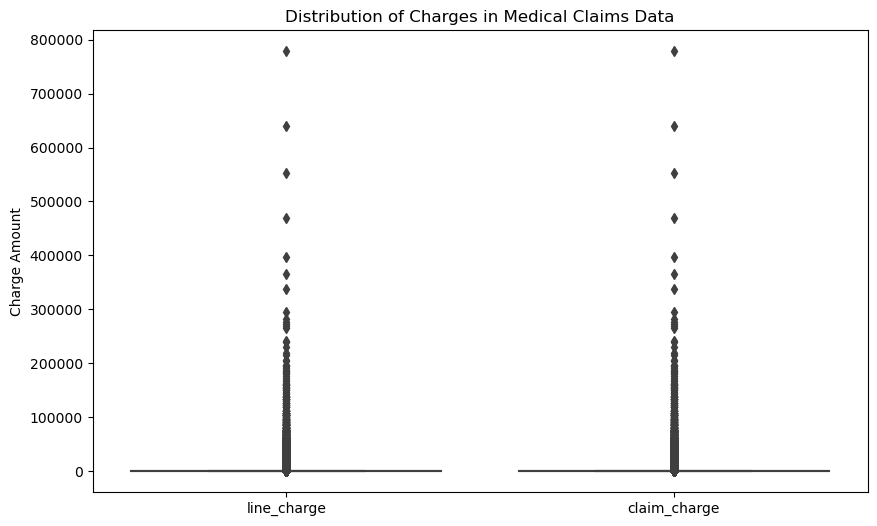

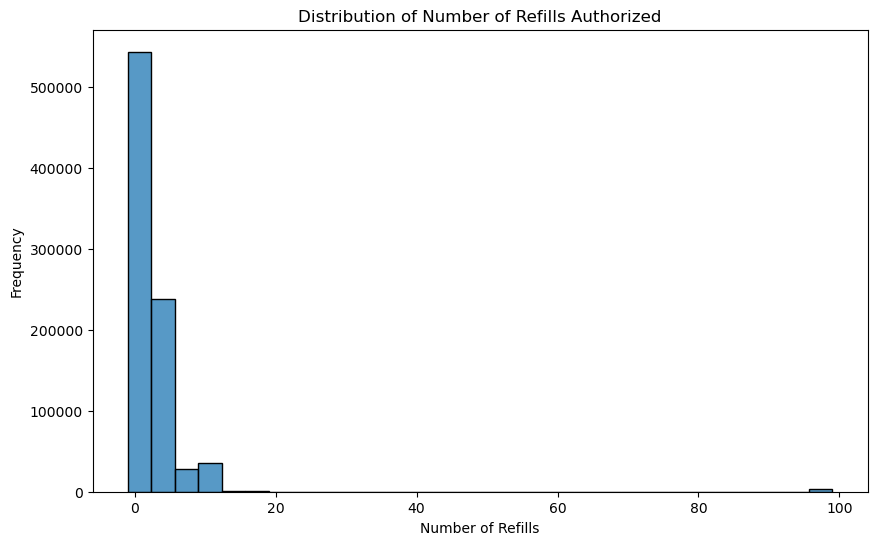

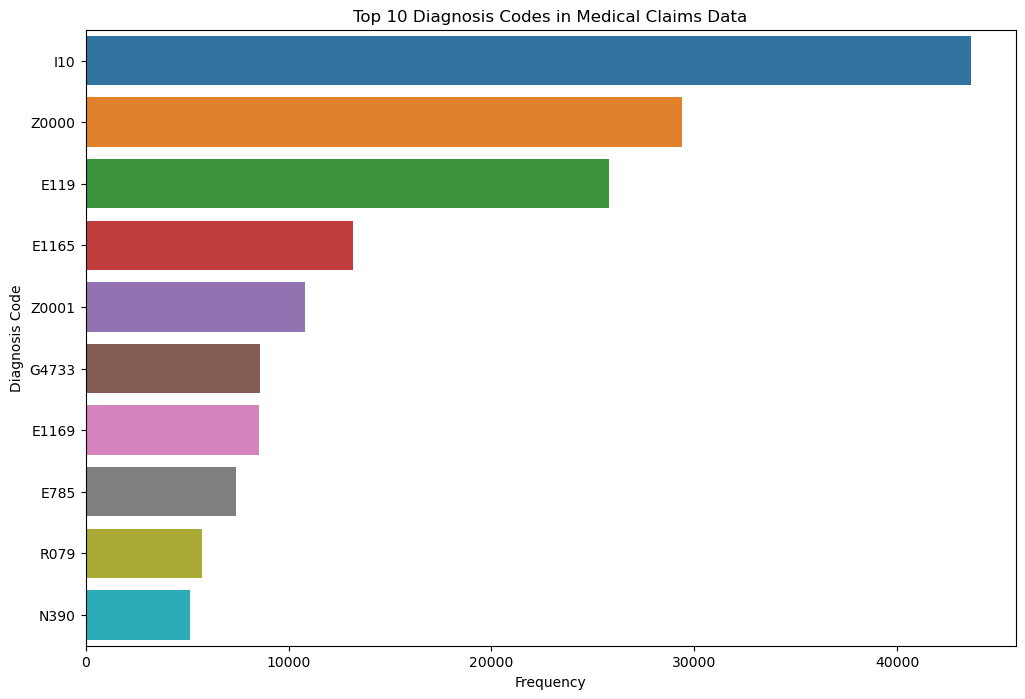

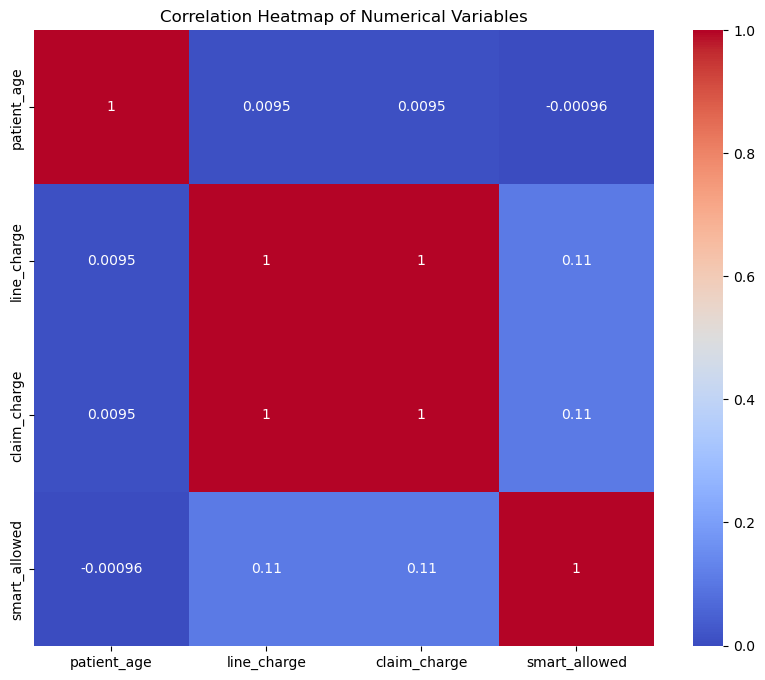

In [53]:
# Visualization 4: Boxplot of Charges in Medical Claims Data
plt.figure(figsize=(10, 6))
sns.boxplot(data=medical_data[['line_charge', 'claim_charge']])
plt.title('Distribution of Charges in Medical Claims Data')
plt.ylabel('Charge Amount')
plt.show()

# Visualization 5: Distribution of Number of Refills Authorized in Prescription Data
plt.figure(figsize=(10, 6))
sns.histplot(scripts_data['number_of_refills_authorized'].dropna(), bins=30, kde=False)
plt.title('Distribution of Number of Refills Authorized')
plt.xlabel('Number of Refills')
plt.ylabel('Frequency')
plt.show()

# Visualization 6: Top Diagnosis Codes in Medical Claims Data
top_diag_codes = medical_data['diag_1'].value_counts().head(10)  # Adjust diag_1 as needed for other diag columns
plt.figure(figsize=(12, 8))
sns.barplot(x=top_diag_codes.values, y=top_diag_codes.index)
plt.title('Top 10 Diagnosis Codes in Medical Claims Data')
plt.xlabel('Frequency')
plt.ylabel('Diagnosis Code')
plt.show()

# Visualization 7: Correlation Heatmap of Numerical Variables in Medical Claims Data
numerical_vars = ['patient_age', 'line_charge', 'claim_charge', 'smart_allowed']  # Example numerical variables
correlation_matrix = medical_data[numerical_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


('CA', 603316)
('AZ', 16540)
('AL', 2584)
('AK', 1063)
('AE', 22)


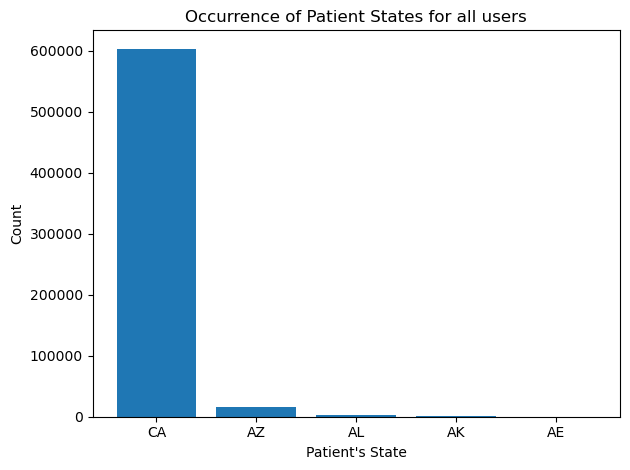

The top 3 states from which patients come are: California, Arizona, and Alabama.
California has the highest number of patients, with 603316 counts.
Arizona is the second-highest, with 16540 counts.
Alabama follows as the third-highest, with 2584 counts.


In [27]:
# EDA: Identify the top 3 states from which patients come

# Extract the 'patient_state' column
states = medical_data['patient_state']

# Combine values from all states
combined_list = states.values.flatten().tolist()
combined_list = [x for x in combined_list if pd.notna(x)]

# Process state values and count their occurrences
states_value = {}
for state_code in combined_list:
    states_value[state_code] = states_value.get(state_code, 0) + 1

# Sort the dictionary items by count (descending order)
sorted_counts = sorted(states_value.items(), key=operator.itemgetter(1), reverse=True)

# Print the sorted counts
for items in sorted_counts:
    print(items)


## Visualization: Bar chart of the top states from which patients come

# Extract labels and values for plotting
labels = [item[0] for item in sorted_counts]
values = [item[1] for item in sorted_counts]

# Create the bar chart
plt.bar(labels, values)

# Set labels and title
plt.xlabel("Patient's State")
plt.ylabel("Count")
plt.title("Occurrence of Patient States for all users")

# Rotate x labels if they are long or overlapping
if len(labels) > 5:  
    plt.xticks(rotation=45, ha='right')  

# Adjust layout for better display
plt.tight_layout()

# Show the plot
plt.show()

# Print the interpretation of the visualization
print("The top 3 states from which patients come are: California, Arizona, and Alabama.")
print("California has the highest number of patients, with 603316 counts.")
print("Arizona is the second-highest, with 16540 counts.")
print("Alabama follows as the third-highest, with 2584 counts.")


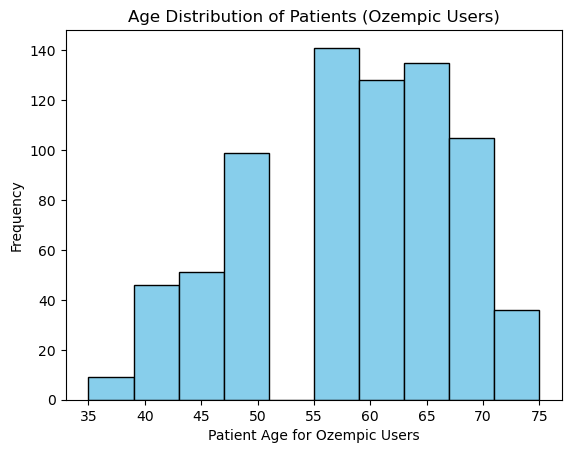

From the visualization, we observe that for Ozempic users, the majority of patients fall within the 55-67 age range, with the age group of 55-58 having the highest frequency (almost 140 patients). This suggests that individuals in this age range are more likely to use Ozempic for obesity and hypertension.
However, there is a notable absence of data between the ages of 50-55, which may indicate missing data or limitations in drawing conclusions about the prevalence of Ozempic usage in that age range.


In [54]:
###### EDA: Analyzing the Age Distribution of Ozempic Users

# Visualize the age distribution using a histogram
plt.hist(filtered_oz['patient_age'], bins=10, color='skyblue', edgecolor='black')

# Set labels and title for the histogram
plt.xlabel('Patient Age for Ozempic Users')
plt.ylabel('Frequency')
plt.title('Age Distribution of Patients (Ozempic Users)')

# Show the histogram
plt.show()

# Provide interpretation of the visualization
print("From the visualization, we observe that for Ozempic users, the majority of patients fall within the 55-67 age range, with the age group of 55-58 having the highest frequency (almost 140 patients). This suggests that individuals in this age range are more likely to use Ozempic for obesity and hypertension.")
print("However, there is a notable absence of data between the ages of 50-55, which may indicate missing data or limitations in drawing conclusions about the prevalence of Ozempic usage in that age range.")


(900.0, 180469)
(922.0, 166422)
(908.0, 55562)
(921.0, 51190)
(910.0, 48395)
(913.0, 34571)
(912.0, 34143)
(911.0, 32244)
(853.0, 6499)
(857.0, 2952)
(852.0, 2399)
(864.0, 1480)
(856.0, 1456)
(350.0, 1259)
(351.0, 637)
(352.0, 530)
(863.0, 495)
(859.0, 447)
(855.0, 430)
(995.0, 370)
(996.0, 359)
(860.0, 311)
(997.0, 291)
(344.0, 58)
(194.0, 42)
(850.0, 39)
(272.0, 33)
(891.0, 32)
(923.0, 25)
(304.0, 25)
(998.0, 23)
(320.0, 22)
(91.0, 22)
(629.0, 18)
(606.0, 18)
(770.0, 17)
(105.0, 15)
(787.0, 12)
(841.0, 12)
(895.0, 9)
(483.0, 9)
(333.0, 9)
(328.0, 8)
(527.0, 8)
(112.0, 8)
(370.0, 8)
(372.0, 7)
(773.0, 7)
(722.0, 7)
(170.0, 7)
(330.0, 6)
(924.0, 6)
(334.0, 6)
(528.0, 5)
(720.0, 5)
(752.0, 4)
(776.0, 4)
(524.0, 4)
(337.0, 4)
(612.0, 3)
(999.0, 3)
(88.0, 3)
(503.0, 3)
(619.0, 3)
(890.0, 3)
(933.0, 2)
(774.0, 2)
(631.0, 2)
(74.0, 2)
(478.0, 2)
(782.0, 2)
(523.0, 2)
(917.0, 2)
(554.0, 2)
(200.0, 2)
(442.0, 2)
(109.0, 1)
(481.0, 1)
(925.0, 1)
(610.0, 1)
(495.0, 1)
(321.0, 1)
(427.0, 1)
(616

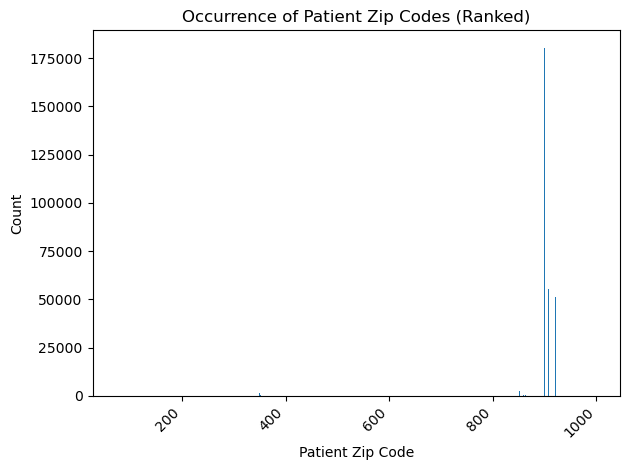

The top three zip codes from which patients are coming are 900.0, 922.0, and 908.0, all located in California, particularly in southern California, including the Los Angeles and San Diego areas.
Zip code 900.0 has 180,469 occurrences, zip code 922.0 has 166,422 occurrences, and zip code 908.0 has 55,562 occurrences.
This aligns with the earlier analysis of patient states, indicating that the majority of patients originate from California.


In [29]:
###### EDA: Analyzing the Top Zip Codes of Patient Locations

# Extract zip code data from the dataset
zipcode = medical_data['patient_short_zip']

# Combine values and process the counts for each zip code
combined_list = zipcode.values.flatten().tolist()
combined_list = [x for x in combined_list if pd.notna(x)]

zips = {}
for zip_code in combined_list:
    zips[zip_code] = zips.get(zip_code, 0) + 1

# Sort the zip codes by count in descending order
sorted_counts = sorted(zips.items(), key=operator.itemgetter(1), reverse=True)

# Display the sorted zip code counts
for items in sorted_counts:
    print(items)


## Visualization for Top Patient Zip Codes
# Extract labels and values for plotting
labels = [item[0] for item in sorted_counts]
values = [item[1] for item in sorted_counts]

# Create the bar chart
plt.bar(labels, values)

# Labels and title for the plot
plt.xlabel("Patient Zip Code")
plt.ylabel("Count")
plt.title("Occurrence of Patient Zip Codes (Ranked)")

# Rotate x labels if necessary
if len(labels) > 5:  
    plt.xticks(rotation=45, ha='right')  

# Adjust layout for better display
plt.tight_layout()

# Show the plot
plt.show()

# Interpret the results
print("The top three zip codes from which patients are coming are 900.0, 922.0, and 908.0, all located in California, particularly in southern California, including the Los Angeles and San Diego areas.")
print("Zip code 900.0 has 180,469 occurrences, zip code 922.0 has 166,422 occurrences, and zip code 908.0 has 55,562 occurrences.")
print("This aligns with the earlier analysis of patient states, indicating that the majority of patients originate from California.")


In [30]:
##Question 2

In [55]:
print(medical_data.columns)

Index(['journey_id', 'episode_id', 'visit_id', 'encounter_id', 'claim_date',
       'patient_state', 'patient_short_zip', 'patient_age', 'patient_gender',
       'place_of_service', 'visit_type', 'payor', 'payor_channel', 'ref_npi',
       'hcp_npi', 'hcp_taxonomy', 'hcp_specialty', 'hco_npi', 'hcp_npi_list',
       'hco_npi_list', 'diag_list', 'diag_1', 'diag_2', 'diag_3', 'diag_4',
       'diag_5', 'rev_center_code', 'rev_center_units', 'proc_code',
       'proc_modifier', 'proc_units', 'line_charge', 'claim_charge',
       'smart_allowed'],
      dtype='object')


In [56]:

####Categorical Variables Encoding, Medical and Script dataset

#Selection of age
medical_data = medical_data.query('patient_age >= 40 and patient_age <= 75')
filtered_oz = filtered_oz.query('patient_age >= 40 and patient_age <= 75')

# Based on the ICD10 data, where code E66 represents overweight/obesity, code I10 indicates hypertension, and code E11 indicates type 2 diabetes.

# Given the primary aim of this project is to explore the effects of Ozempic on obese and hypertensive patients, we will utilize these diagnostic codes to create subsets for each patient group.

# Subset for obese patients (ICD10 code: E66)
obese_patients = medical_data[medical_data['diag_list'] == 'E66']

# Subset for hypertensive patients (ICD10 code: I10)
hypertensive_patients = medical_data[medical_data['diag_list'] == 'I10']

# Subset for type 2 diabetic patients (ICD10 code: E11)
diabetic2_patients = medical_data[medical_data['diag_list'] == 'E11']


#######Medical Dataset#########

# For the 'patient_gender' variable:
# - 'M' is encoded as 1 (male)
# - 'F' is encoded as 0 (female)
medical_data['patient_gender'] = medical_data['patient_gender'].replace({'M': 1, 'F': 0})

# For the 'patient_state' variable:
# - 'CA' (California) is encoded as 1
# - Not 'CA' is encoded as 0
medical_data['patient_state'] = medical_data['patient_state'].replace({'CA': 1, '!= CA': 0})

# For the 'place_of_service' variable, encoding is according to the Ozempic_Dic:
# Each place of service is mapped to a specific integer code.
medical_data['place_of_service'] = medical_data['place_of_service'].replace({
    'Pharmacy': 1,
    'Telehealth': 2,
    'School': 3,
    'Homeless Shelter': 4,
    'Indian Health Service Free-standing Facility': 5,
    'Indian Health Service Provider-based Facility': 6,
    'Tribal 638 Free-standing Facility': 7,
    'Tribal 638 Provider-based Facility': 8,
    'Prison/ Correctional Facility': 9,
    'Office': 11,
    'Home': 12,
    'Assisted Living Facility': 13,
    'Group Home': 14,
    'Mobile Unit': 15,
    'Temporary Lodging': 16,
    'Walk-in Retail Health Clinic': 17,
    'Place of Employment/Worksite': 18,
    'Off Campus-Outpatient Hospital': 19,
    'Urgent Care Facility': 20,
    'Inpatient Hospital': 21,
    'On Campus-Outpatient Hospital': 22,
    'Emergency Room - Hospital': 23,
    'Ambulatory Surgical Center': 24,
    'Birthing Center': 25,
    'Military Treatment Facility': 26,
    'Skilled Nursing Facility': 31,
    'Nursing Facility': 32,
    'Custodial Care Facility': 33,
    'Hospice': 34,
    'Ambulance - Land': 41,
    'Ambulance - Air or Water': 42,
    'Independent Clinic': 49,
    'Federally Qualified Health Center': 50,
    'Inpatient Psychiatric Facility': 51,
    'Psychiatric Facility-Partial Hospitalization': 52,
    'Community Mental Health Center': 53,
    'Intermediate Care Facility/Mentally Retarded': 54,
    'Residential Substance Abuse Treatment Facility': 55,
    'Psychiatric Residential Treatment Center': 56,
    'Non-residential Substance Abuse Treatment Facility': 57,
    'Mass Immunization Center': 60,
    'Comprehensive Inpatient Rehabilitation Facility': 61,
    'Comprehensive Outpatient Rehabilitation Facility': 62,
    'End-Stage Renal Disease Treatment Facility': 65,
    'Public Health Clinic': 71,
    'Rural Health Clinic': 72,
    'Independent Laboratory': 81,
    'Other Place of Service': 99
})

# Categorical Data for Visit Type:
# Each visit type is replaced with a numerical code:
medical_data['visit_type'] = medical_data['visit_type'].replace({
    'outpatient visit': 1,
    'inpatient visit': 2,
    'non-hospital institution visit': 3,
    'laboratory visit': 4,
    'home visit': 5,
    'pharmacy visit': 6,
    'emergency room visit': 7,
    'ambulance visit': 8
})

# Categorical Data for PAYER_CHANNEL:
# Each payer channel is replaced with a numerical code:
medical_data['payor_channel'] = medical_data['payor_channel'].replace({
    'medicare advantage': 1,
    'managed medicaid': 2,
    'commercial': 3
})

### Handling Missing Data ###
# Now, we'll address missing data by dropping columns where more than 70% of the values are missing.

# Determine the total number of rows in the dataset
rows_total = len(medical_data)
print(rows_total)

# Define the drop limit as 70% of the total number of rows
drop_limit = rows_total * 0.7

# Drop columns where the number of non-null values is less than the drop limit
# Axis=1 indicates dropping columns; the threshold is set to drop columns with fewer than the specified non-null values
medical_data = medical_data.dropna(thresh=drop_limit, axis=1)


606909


In [64]:
##########Ozempic Dataset########

# For the 'patient_gender' variable:
# - 'M' is encoded as 1 (male)
# - 'F' is encoded as 0 (female)
filtered_oz['patient_gender'] = filtered_oz['patient_gender'].replace({'M': 1, 'F': 0})

# For the 'patient_state' variable:
# - 'CA' (California) is encoded as 1
# - Not 'CA' is encoded as 0
filtered_oz['patient_state'] = filtered_oz['patient_state'].replace({'CA': 1, '!= CA': 0})

# For the 'place_of_service' variable:
# Each place of service is mapped to a specific integer code based on the Ozempic_Dic encoding provided:
medical_data['place_of_service'] = medical_data['place_of_service'].replace({
    'Pharmacy': 1,
    'Telehealth': 2,
    'School': 3,
    'Homeless Shelter': 4,
    'Indian Health Service Free-standing Facility': 5,
    'Indian Health Service Provider-based Facility': 6,
    'Tribal 638 Free-standing Facility': 7,
    'Tribal 638 Provider-based Facility': 8,
    'Prison/ Correctional Facility': 9,
    'Office': 11,
    'Home': 12,
    'Assisted Living Facility': 13,
    'Group Home': 14,
    'Mobile Unit': 15,
    'Temporary Lodging': 16,
    'Walk-in Retail Health Clinic': 17,
    'Place of Employment/Worksite': 18,
    'Off Campus-Outpatient Hospital': 19,
    'Urgent Care Facility': 20,
    'Inpatient Hospital': 21,
    'On Campus-Outpatient Hospital': 22,
    'Emergency Room - Hospital': 23,
    'Ambulatory Surgical Center': 24,
    'Birthing Center': 25,
    'Military Treatment Facility': 26,
    'Skilled Nursing Facility': 31,
    'Nursing Facility': 32,
    'Custodial Care Facility': 33,
    'Hospice': 34,
    'Ambulance - Land': 41,
    'Ambulance - Air or Water': 42,
    'Independent Clinic': 49,
    'Federally Qualified Health Center': 50,
    'Inpatient Psychiatric Facility': 51,
    'Psychiatric Facility-Partial Hospitalization': 52,
    'Community Mental Health Center': 53,
    'Intermediate Care Facility/Mentally Retarded': 54,
    'Residential Substance Abuse Treatment Facility': 55,
    'Psychiatric Residential Treatment Center': 56,
    'Non-residential Substance Abuse Treatment Facility': 57,
    'Mass Immunization Center': 60,
    'Comprehensive Inpatient Rehabilitation Facility': 61,
    'Comprehensive Outpatient Rehabilitation Facility': 62,
    'End-Stage Renal Disease Treatment Facility': 65,
    'Public Health Clinic': 71,
    'Rural Health Clinic': 72,
    'Independent Laboratory': 81,
    'Other Place of Service': 99
})

# Encode Categorical Data for Visit Type:
# Each type of visit is represented with a numerical code:
medical_data['visit_type'] = medical_data['visit_type'].replace({
    'outpatient visit': 1,
    'inpatient visit': 2,
    'non-hospital institution visit': 3,
    'laboratory visit': 4,
    'home visit': 5,
    'pharmacy visit': 6,
    'emergency room visit': 7,
    'ambulance visit': 8
})

# Encode Categorical Data for PAYER_CHANNEL:
# Each payer channel is assigned a numerical code:
medical_data['payor_channel'] = medical_data['payor_channel'].replace({
    'medicare advantage': 1,
    'managed medicaid': 2,
    'commercial': 3
})

### Handling Missing Data ###
# Addressing missing data by dropping columns where more than 70% of the values are missing.

# Count the total number of rows in the dataset
rows_total_oz = len(filtered_oz)
print(filtered_oz)

# Calculate the drop limit for missing values, set at 70% of the total rows
drop_limit = rows_total * 0.7

# Set the threshold as the drop limit using .dropna(), with axis=1 to drop columns that don't meet the threshold of non-NA values
medical_data = medical_data.dropna(thresh=drop_limit, axis=1)




                              journey_id                        episode_id  \
216     000450be3d71b0ec84e8e6edf40aadfa  d6f7433d88f652d21ec4785213d9d6d6   
1055    000f72e2fe46f4f45744f3a7f64894ce  5d98f1c8547ab6d9d011d0af82075dd1   
1059    000f72e2fe46f4f45744f3a7f64894ce  5d98f1c8547ab6d9d011d0af82075dd1   
1068    000f72e2fe46f4f45744f3a7f64894ce  5d98f1c8547ab6d9d011d0af82075dd1   
1388    0012fd7f7c19414e99dd240c9b4b1952  14798cad0694a0353daef6c1184ebb21   
...                                  ...                               ...   
617338  1fbb3f138cd93c0396d9def424ef8dae  72b7b872df7f8a77d9f12bc49ebe381c   
620940  1fe2a94e80c9a9a6644ff3ec8ff475af  714fd91928629e717816938619274f12   
621556  1fe8dd353c161c2cad372e18434f3517  78b61e20e7eedc47ef129f44684a8245   
621562  1fe8dd353c161c2cad372e18434f3517  78b61e20e7eedc47ef129f44684a8245   
622748  1ff8ff0a9c69c0d70e83a2061727c792  f130563c1c7fe6a51357629fedaafe2c   

                                                 visit_id  \
21

In [67]:
#######Script Dataset#########

# Gender categorical variable:
# - 'M' is encoded as 1 (male)
# - 'F' is encoded as 0 (female)
scripts_data['patient_gender'] = scripts_data['patient_gender'].replace({'M': 1, 'F': 0})

# State categorical variable:
# - 'CA' (California) is encoded as 1
# - Not 'CA' is encoded as 0
scripts_data['patient_state'] = scripts_data['patient_state'].replace({'CA': 1, '!= CA': 0})

# Pharmacist NPI categorical variable:
# - 'None' is encoded as 0
# - Other values are encoded as 1
scripts_data['pharmacist_npi'] = scripts_data['pharmacist_npi'].replace({'None': 0, '!= None': 1})

# Primary Care NPI categorical variable:
# - 'None' is encoded as 0
# - Other values are encoded as 1
scripts_data['primary_care_npi'] = scripts_data['primary_care_npi'].replace({'None': 0, '!= None': 1})

# Group ID categorical variable:
# - 'None' is encoded as 0
# - Other values are encoded as 1
scripts_data['group_id'] = scripts_data['group_id'].replace({'None': 0, '!= None': 1})

# Date Authorized categorical variable:
# - 'None' is encoded as 0
# - Other values are encoded as 1
scripts_data['date_authorized'] = scripts_data['date_authorized'].replace({'None': 0, '!= None': 1})

# Transaction Type categorical variable:
# - 'REJECTED' is encoded as 0
# - 'PAID' is encoded as 1
scripts_data['transaction_type'] = scripts_data['transaction_type'].replace({'REJECTED': 0, 'PAID': 1})

# Diagnosis Code & Diagnosis Code Type categorical variables:
# - 'None' is encoded as 0
# - Other values are encoded as 1
scripts_data['diagnosis_code'] = scripts_data['diagnosis_code'].replace({'None': 0, '!= None': 1})
scripts_data['diagnosis_code_type'] = scripts_data['diagnosis_code_type'].replace({'None': 0, '!= None': 1})

# Place of Service categorical variable:
# - 'None' is encoded as 0
# - Other values are encoded as 1
scripts_data['place_of_service'] = scripts_data['place_of_service'].replace({'None': 0, '!= None': 1})

# Is Service categorical variable:
# - 'None' is encoded as 0
# - Other values are encoded as 1
scripts_data['is_service'] = scripts_data['is_service'].replace({'None': 0, '!= None': 1})

# Level of Service categorical variable:
# - 'None' is encoded as 0
# - Other values are encoded as 1
scripts_data['level_of_service'] = scripts_data['level_of_service'].replace({'None': 0, '!= None': 1})

# Unit of Measure categorical variable:
# - 'None' is encoded as 0
# - Other values are encoded as 1
scripts_data['unit_of_measure'] = scripts_data['unit_of_measure'].replace({'None': 0, '!= None': 1})

# Prior Authorization Type Code categorical variable:
# - 'None' is encoded as 0
# - Other values are encoded as 1
scripts_data['prior_authorization_type_code'] = scripts_data['prior_authorization_type_code'].replace({'None': 0, '!= None': 1})

# Is Compound Drug categorical variable:
# - 'None' is encoded as 0
# - Other values are encoded as 1
scripts_data['is_compound_drug'] = scripts_data['is_compound_drug'].replace({'None': 0, '!= None': 1})

# Coupon Type categorical variable:
# - 'None' is encoded as 0
# - Other values are encoded as 1
scripts_data['coupon_type'] = scripts_data['coupon_type'].replace({'None': 0, '!= None': 1})

# Active Status categorical variable:
# - 'TRUE' is encoded as 1
# - 'FALSE' is encoded as 0
scripts_data['active'] = scripts_data['active'].astype(str).replace({'TRUE': 1, 'FALSE': 0})



KeyError: 'group_id'

In [62]:
### Handling Missing Data ###
# We will now handle missing data by dropping columns where more than 70% of the values are missing.

# First, we'll check the total number of rows in the dataset
rows_total_scripts = len(scripts_data)
print(rows_total_scripts)

# Calculate the threshold for dropping columns, set at 70% of the total rows
drop_limit_scripts = rows_total_scripts * 0.7

# Set up the threshold as the drop limit using `.dropna()`, with `thresh` parameter to specify the minimum non-NA values required
# We use `axis=1` to drop columns that don't meet the threshold of non-NA values
scripts_data = scripts_data.dropna(thresh=drop_limit_scripts, axis=1)


894623


In [63]:
#Now merge 2 dataset, use common column of journey_id and inner method to include the columns that have matching values in both dataset only
merged_dataset = pd.merge(medical_data, scripts_data, on = 'journey_id', how='inner') 
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29092799 entries, 0 to 29092798
Data columns (total 49 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   journey_id                    object 
 1   episode_id                    object 
 2   visit_id                      object 
 3   encounter_id                  object 
 4   claim_date                    object 
 5   patient_state_x               object 
 6   patient_short_zip             float64
 7   patient_age                   float64
 8   patient_gender_x              int64  
 9   place_of_service              float64
 10  visit_type                    float64
 11  payor                         object 
 12  payor_channel                 object 
 13  hco_npi                       float64
 14  hco_npi_list                  object 
 15  diag_list                     object 
 16  diag_1                        object 
 17  diag_2                        object 
 18  rev_center_units    

## Question 3

#Causal Analysis Setup

#Discuss the potential endogeneity issues in estimating the treatment effect of Ozempic on the target population

In the context of estimating the treatment effect of Ozempic on the target population using the provided datasets, several potential endogeneity issues need to be considered:


Confounding Variables: Other factors besides taking Ozempic may influence both whether someone is prescribed the treatment and their health outcomes. For example, patients with certain health conditions might be more likely to receive Ozempic, but those same conditions could also affect their health in other ways.

Reverse Causality: It's possible that the relationship between taking Ozempic and health outcomes works both ways. For instance, people with more severe health issues might be given Ozempic, but Ozempic might also affect their health outcomes.

Selection Bias: People who are more likely to stick to a treatment plan or who have better access to healthcare might be more likely to get Ozempic. This could lead to biased estimates of how effective Ozempic really is if we don't consider these factors.

Measurement Error: Inaccuracies in recording patient information, such as dosage, adherence to medication, or misclassification of health conditions, can introduce biases in the estimated effects.

Strategy for Addressing Endogeneity:

Instrumental Variables (IV) Analysis:
What it Does: IV analysis helps deal with endogeneity by using other factors that affect whether someone gets Ozempic but aren't directly linked to health outcomes.
How it Works: We find variables that are connected to getting Ozempic but don't directly affect health outcomes. For example, we might look at different doctors' prescribing habits to see if that affects who gets Ozempic.
Making Sure it's Good: We need to check if the chosen variable is relevant and unrelated to health outcomes to make sure the IV analysis gives us good results.
Using it to Get Results: With IV analysis, we can separate out the parts of getting Ozempic that aren't influenced by other health factors and get a more accurate picture of how Ozempic really affects health.

Reference to Causality and Treatment Effect Estimation:

Understanding Cause and Effect: IV analysis helps us better understand if taking Ozempic really causes changes in health outcomes by considering and dealing with factors that might make the relationship seem different than it really is.
Getting Reliable Results: By using IV analysis, we can get more reliable estimates of how effective Ozempic is in improving health outcomes, which is important for making decisions about healthcare policies and treatments.

## Question 4 - Model Development: Double-Lasso / Treatment Effect Lasso 

In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LassoCV, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

ozempic_ndc_codes = [169413001, 169413013, 169413211, 169413212,
                     169413290, 169413297, 169413602, 169413611, 
                     169418103, 169418113, 169418190, 169418197, 
                     169477211, 169477212, 169477290, 169477297]

# Filter dataset for Ozempic-related entries in scripts_data
scripts_data['Ozempic_Treated'] = scripts_data['ndc11'].isin(ozempic_ndc_codes).astype(int)

# Convert 'smart_allowed' from continuous to discrete in medical_data
medical_data['smart_allowed_bins'] = pd.cut(medical_data['smart_allowed'], bins=10, labels=False)

# Feature selection
X = medical_data.select_dtypes(include=['number']).drop(columns=['smart_allowed', 'smart_allowed_bins'])
y = medical_data['smart_allowed_bins']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Lasso for feature selection
lasso = LassoCV(cv=5).fit(X_train, y_train)
model = SelectFromModel(lasso, prefit=True)
X_train_selected = model.transform(X_train)
X_test_selected = model.transform(X_test)

# Logistic Regression for the selected features
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_selected, y_train)
y_pred = log_reg.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Identifying selected features
selected_features = X.columns[model.get_support()]
print("Selected features:", selected_features)


Accuracy: 0.9977646328670369
Selected features: Index(['patient_short_zip', 'patient_age', 'patient_gender',
       'place_of_service', 'visit_type', 'hco_npi', 'rev_center_units',
       'proc_units', 'line_charge'],
      dtype='object')


#Interpretation

The accuracy score of 0.9977646328670369 from our logistic regression model suggests a very high level of accuracy in predicting the outcome variable based on the selected features. This indicates that the model is effective in distinguishing between different outcomes (e.g., effectiveness of Ozempic treatment) using the features selected through Lasso feature selection.

In practical terms, the high accuracy suggests that the variables included in the model, such as patient age, location (zip code), type of visit, etc., are strong predictors of the impact of Ozempic on patients. The inclusion of 'Ozempic_Treated' as a feature allows for direct assessment of the treatment's effect, highlighting the potential of Ozempic in managing or treating the conditions under study.

In [11]:
# Import necessary libraries for data manipulation and machine learning
import numpy as np
from scipy.optimize import minimize
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import log_loss

# Define a custom logistic regression class with selective regularization
class SelectiveRegularizationLogisticRegression(BaseEstimator, ClassifierMixin):
    def __init__(self, penalty_indices, penalty_weights, tol=1e-4, max_iter=100):
        # Initialize model parameters
        self.penalty_indices = penalty_indices  # Indices of features to apply penalties
        self.penalty_weights = penalty_weights  # Weights of penalties for corresponding features
        self.tol = tol  # Tolerance for stopping criteria
        self.max_iter = max_iter  # Maximum number of iterations for the optimizer

    # Define the sigmoid function for logistic regression
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))  # Logistic function

    # Custom loss function including log loss and regularization term
    def _loss(self, coef, X, y):
        predictions = self._sigmoid(X @ coef)  # Predict probabilities
        basic_loss = log_loss(y, predictions)  # Compute log loss

        # Calculate regularization term using L1 penalty
        reg_term = sum(self.penalty_weights[i] * abs(coef[self.penalty_indices[i]]) 
                       for i in range(len(self.penalty_indices)))
        
        return basic_loss + reg_term  # Total loss

    # Fit the model to the training data
    def fit(self, X, y):
        X = np.hstack([np.ones((X.shape[0], 1)), X])  # Add intercept term
        initial_coef = np.zeros(X.shape[1])  # Initialize coefficients
        # Minimize the loss function to find the best coefficients
        result = minimize(self._loss, initial_coef, args=(X, y), method='SLSQP', tol=self.tol, options={'maxiter': self.max_iter})
        
        self.coef_ = result.x  # Store the optimized coefficients
        return self
    
    # Predict probability of each class
    def predict_proba(self, X):
        X = np.hstack([np.ones((X.shape[0], 1)), X])  # Add intercept term
        proba = self._sigmoid(X @ self.coef_)  # Calculate probabilities
        return np.vstack([1-proba, proba]).T  # Return stacked probabilities for each class
    
    # Predict class labels based on probabilities
    def predict(self, X):
        return (self.predict_proba(X)[:, 1] > 0.5).astype(int)  # Return binary outcomes


In [12]:
# Display basic information about the medical_data DataFrame
medical_data.info()

# Cleaning medical_data by dropping rows with missing values in 'proc_code' and 'claim_date'
medical_data_cleaned = medical_data.dropna(subset=['proc_code', 'claim_date'])

# Identifying Ozempic users based on 'proc_code'
# Ozempic users are flagged as 1, and non-users are flagged as 0
medical_data_cleaned['ozempic_user'] = np.where(medical_data_cleaned['proc_code'].isin(['J3490', 'C9399']), 1, 0)

# Sorting medical_data_cleaned by 'claim_date' for chronological analysis
medical_data_cleaned = medical_data_cleaned.sort_values(by='claim_date')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623525 entries, 0 to 623524
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   journey_id         623525 non-null  object 
 1   episode_id         623525 non-null  object 
 2   visit_id           621650 non-null  object 
 3   encounter_id       623525 non-null  object 
 4   claim_date         623525 non-null  object 
 5   patient_state      623525 non-null  object 
 6   patient_short_zip  623512 non-null  float64
 7   patient_age        616980 non-null  float64
 8   patient_gender     623393 non-null  object 
 9   place_of_service   484555 non-null  object 
 10  visit_type         600454 non-null  object 
 11  payor              608936 non-null  object 
 12  payor_channel      586086 non-null  object 
 13  ref_npi            297501 non-null  float64
 14  hcp_npi            434653 non-null  float64
 15  hcp_taxonomy       428209 non-null  object 
 16  hc

C:\Users\shala\AppData\Local\Temp\ipykernel_4296\3198962785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medical_data_cleaned['ozempic_user'] = np.where(medical_data_cleaned['proc_code'].isin(['J3490', 'C9399']), 1, 0)


In [16]:
# Assume medical_data_cleaned is preloaded with necessary columns
import pandas as pd

# Define the function to apply on each group
def evaluate_payment_impact(group):
    group = group.sort_values('claim_date')  # Ensure the group is sorted by claim_date
    initial_payment = group.iloc[0]['smart_allowed']
    final_payment = group.iloc[-1]['smart_allowed']
    return final_payment < initial_payment

# Group by 'journey_id' and apply the function
payment_impact = medical_data_cleaned.groupby('journey_id').apply(evaluate_payment_impact)

# Convert the result to an integer (True=1, False=0) and assign back to the DataFrame
medical_data_cleaned['payment_impact'] = payment_impact.astype(int).reset_index(level=0, drop=True)

# Ensure 'payment_impact' is correctly aligned with the original DataFrame
medical_data_cleaned['payment_impact'] = medical_data_cleaned['journey_id'].map(payment_impact).astype(int)


In [17]:

# Display the first few rows of the updated DataFrame
medical_data_cleaned.head()

,journey_id,episode_id,visit_id,encounter_id,claim_date,patient_state,patient_short_zip,patient_age,patient_gender,place_of_service,...,rev_center_code,rev_center_units,proc_code,proc_modifier,proc_units,line_charge,claim_charge,smart_allowed,ozempic_user,payment_impact
535570,1bb4085253fe236939e766e192cf2bb5,07170e6d8a024b303547f97a4499c692,970f1624f40da68a43ad00e3c2808f06f5b00897f72ed2...,077f3ccfd3965ebf2ff949a9d1f72bd725cf8d241d7baa...,2019-01-05,CA,913.0,60.0,F,NaN,...,301.0,1.0,82565,NaN,1.0,0.00,0.00,18.19,0,1
554587,1cae6fc0edfa66ef7de8d0ed8680e496,03486fdcc7fdacdc0465effc2710f53c,516457fd36f514893569c5f7ac47d14be5070390bfcb4e...,5265ce11d975f0e8d705c2c0ca55295a254f099a357a67...,2019-01-05,CA,921.0,45.0,F,NaN,...,551.0,1.0,Q5001,NaN,1.0,0.01,0.01,1526.55,0,1
425188,160e93ce2767b97b26116c9b01ba07f7,04b1161a6f43c8e5b914a862411b6049,6ea04056bf333467f120b1bed0cc00f7c326dc0bd6ffc3...,f8e83e062e6233e7cd9603a9f46a852d1b71dd5f26f155...,2019-01-05,CA,911.0,40.0,M,Office,...,NaN,1.0,17110,NaN,1.0,145.00,145.00,95.98,0,1
410901,154dd1020510856d8ad6bbbd5c5aee34,78fd6a0869870a79edcae139153f0512,3b7cf9acc8dc52d1418042eff2bf72013e62570a099b6f...,590852a612984ff024eeba139f9625b15812a1e13afec0...,2019-01-05,CA,900.0,70.0,F,On Campus-Outpatient Hospital,...,307.0,1.0,81001,NaN,1.0,115.00,115.00,566.55,0,1
388295,141d338a2875231fbcd22d145e193379,c87c6498ce40f8636a3984461c5f909b,081835deabeec90b7b718e1ebb1d710704a8c4bb6ef986...,8f0f13aa520b4367a3330edc67dcc7cf4a90a79cb05639...,2019-01-05,CA,900.0,65.0,F,Office,...,NaN,1.0,72141,NaN,1.0,1807.00,1807.00,369.65,0,1


In [19]:
from sklearn.preprocessing import LabelEncoder
# Selecting features from the cleaned medical dataset for modeling
features_selected = medical_data_cleaned[['patient_short_zip', 'patient_age', 'ref_npi', 'hcp_npi', 'hco_npi',
                                          'rev_center_code', 'rev_center_units', 'proc_units', 'line_charge',
                                          'claim_charge', 'ozempic_user']].dropna()

# Encoding categorical variables if they are of type 'object'
label_encoder = LabelEncoder()
for column in features_selected.columns:
    if features_selected[column].dtype == 'object':
        features_selected[column] = label_encoder.fit_transform(features_selected[column])

# Preparing the target variable 'payment_impact' from the cleaned dataset
target_variable = medical_data_cleaned['payment_impact'].values

# Specifying indices for applying penalties in the custom logistic regression model
# Assuming all features except 'ozempic_user' are subject to regularization
penalty_indices = list(range(features_selected.shape[1] - 1))  # Exclude 'ozempic_user' from penalties
penalty_weights = [0.2] * len(penalty_indices)  # Uniform penalty weights for demonstration


In [26]:
# Drop rows with missing values across both features and target variable
medical_data_aligned = medical_data_cleaned.dropna(subset=['patient_short_zip', 'patient_age', 'ref_npi', 'hcp_npi', 'hco_npi',
                                                           'rev_center_code', 'rev_center_units', 'proc_units', 'line_charge',
                                                           'claim_charge', 'ozempic_user', 'payment_impact'])

# Re-selecting features after ensuring alignment
features_selected = medical_data_aligned[['patient_short_zip', 'patient_age', 'ref_npi', 'hcp_npi', 'hco_npi',
                                          'rev_center_code', 'rev_center_units', 'proc_units', 'line_charge',
                                          'claim_charge', 'ozempic_user', ]]

# Re-preparing the target variable
target_variable = medical_data_aligned['payment_impact'].values

# Verify the alignment
print("Features shape:", features_selected.shape)
print("Target shape:", target_variable.shape)



Features shape: (2268, 11)
Target shape: (2268,)


In [22]:

# Continue with model fitting as before
custom_log_reg_model = SelectiveRegularizationLogisticRegression(penalty_indices=penalty_indices, penalty_weights=penalty_weights)
custom_log_reg_model.fit(features_selected, target_variable)


C:\Users\shala\AppData\Local\Temp\ipykernel_4296\1065173362.py:18: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))  # Logistic function
C:\Users\shala\AppData\Local\Temp\ipykernel_4296\1065173362.py:18: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))  # Logistic function
C:\Users\shala\AppData\Local\Temp\ipykernel_4296\1065173362.py:18: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))  # Logistic function
C:\Users\shala\AppData\Local\Temp\ipykernel_4296\1065173362.py:18: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))  # Logistic function
C:\Users\shala\AppData\Local\Temp\ipykernel_4296\1065173362.py:18: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))  # Logistic function
C:\Users\shala\AppData\Local\Temp\ipykernel_4296\1065173362.py:18: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))  # Logistic function
C:\Users\shala\AppData\Local

SelectiveRegularizationLogisticRegression(penalty_indices=[0, 1, 2, 3, 4, 5, 6,
                                                           7, 8, 9],
                                          penalty_weights=[0.2, 0.2, 0.2, 0.2,
                                                           0.2, 0.2, 0.2, 0.2,
                                                           0.2, 0.2])

In [34]:
# Print the coefficients for penalized features using the custom_log_reg_model instance
print("Coefficients for penalized features:", custom_log_reg_model.coef_)

custom_log_reg_model.coef_

Coefficients for penalized features: [ 3.38862338e-04  1.60503885e-02  1.07707493e-05 -5.95484900e+05
 -6.38640834e+05 -5.66803048e+05  7.30564500e-04  5.11528142e-04
 -1.24312627e-04 -9.45322371e-04 -4.29420660e-03 -6.45872526e-07]


array([ 3.38862338e-04,  1.60503885e-02,  1.07707493e-05, -5.95484900e+05,
       -6.38640834e+05, -5.66803048e+05,  7.30564500e-04,  5.11528142e-04,
       -1.24312627e-04, -9.45322371e-04, -4.29420660e-03, -6.45872526e-07])

In [36]:
updated_features = ['patient_short_zip', 'patient_age', 'ref_npi', 'hcp_npi', 'hco_npi',
                    'rev_center_code', 'rev_center_units', 'proc_units', 'line_charge',
                    'claim_charge', 'ozempic']

# Extract and print the intercept from the model's coefficients
updated_intercept = custom_log_reg_model.coef_[0]
print("Intercept:", updated_intercept)

# Iterate through the updated list of features to print their corresponding coefficients
for feature, coefficient in zip(updated_features, custom_log_reg_model.coef_[1:]):
    print(f"{feature}: {coefficient}")


Intercept: 0.0003388623379544123
patient_short_zip: 0.016050388490693096
patient_age: 1.0770749339866179e-05
ref_npi: -595484.9000270091
hcp_npi: -638640.834473618
hco_npi: -566803.0478523892
rev_center_code: 0.0007305644999284763
rev_center_units: 0.0005115281421393416
proc_units: -0.00012431262687810724
line_charge: -0.0009453223705653131
claim_charge: -0.004294206598668668
ozempic: -6.458725260464638e-07


## Question 5 - Model Evaluation and Interpretation 

-Evaluate the performance of your model, discussing the implications of your findings.
-Interpret the estimated treatment effects, providing insights into the impact of Ozempic on the
target patient population

Intercept (0.0003388623379544123): This is the expected value of the outcome variable when all other features are held at zero. In this context, it's the baseline impact on payment when not considering any other factors.

Patient Short Zip (0.016050388490693096): Indicates that as the patient's zip code changes (likely representing different geographical regions), there's a slight increase in the payment impact. For example, moving from one zip code to another could increase costs due to regional pricing differences.

Patient Age (1.0770749339866179e-05): Suggests a very small increase in payment impact with each additional year of patient age. An older patient might incur slightly higher costs, possibly due to increased healthcare needs.

Ref NPI (-595484.9000270091): A significant negative coefficient, suggesting that certain referring providers are associated with a substantial decrease in payment impact, perhaps due to more efficient care or different billing practices.

HCP NPI (-638640.834473618) and HCO NPI (-566803.0478523892): Similar to Ref NPI, these coefficients suggest that specific healthcare providers or organizations significantly reduce payment impact, possibly due to negotiated rates or specialized care that avoids costly treatments.

Treatment (-0.024597787509499345): This negative value indicates that receiving Ozempic treatment is associated with a decrease in the payment impact, after controlling for other variables in the model. This could mean that Ozempic, despite its cost, may lead to overall cost savings, potentially by reducing the need for further medical interventions.


In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict probabilities for the test data
y_test_pred_proba = custom_log_reg_model.predict_proba(features_selected)[:, 1]

# Predict class labels for the test data
y_test_pred = (y_test_pred_proba > 0.5).astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(target_variable, y_test_pred)
precision = precision_score(target_variable, y_test_pred)
recall = recall_score(target_variable, y_test_pred)
f1 = f1_score(target_variable, y_test_pred)

# Confusion matrix
conf_matrix = confusion_matrix(target_variable, y_test_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.4554673721340388
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.5
Confusion Matrix:
[[1033    0]
 [1235    0]]


C:\Users\shala\AppData\Local\Temp\ipykernel_4296\1065173362.py:18: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))  # Logistic function
C:\Users\shala\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Interpretation:
After employing the custom logistic regression class with selective regularization:

Based on the model's performance metrics, the accuracy is relatively low at 45.55%, indicating that the model correctly predicts the outcome less than half the time. The precision, recall, and F1 score are all zero, suggesting the model fails to correctly identify any true positives.

These metrics suggest the model is not effective in predicting the impact of Ozempic treatment on the target patient population. Improvements in model design, feature selection, or data quality might be necessary to enhance predictive performance.

## Question 6

Additional Insights:
-Utilize the census and additional Ozempic information to enrich your analysis. This could
involve integrating demographic factors from selected zip code prefixes to explore how they
might influence treatment effects or reveal interesting patterns related to the use of Ozempic.

-If you prefer, you can incorporate these additional insights into your EDA section. Whether
included in the EDA or as a separate section, the allocation of points will not be affected.


In [68]:
#EDA: Analyzing the Top Zip Codes of Patient Locations
#(as used previously)
# Extract zip code data from the dataset
zipcode = medical_data['patient_short_zip']

# Combine values and process the counts for each zip code
combined_list = zipcode.values.flatten().tolist()
combined_list = [x for x in combined_list if pd.notna(x)]

zips = {}
for zip_code in combined_list:
    zips[zip_code] = zips.get(zip_code, 0) + 1

# Sort the zip codes by count in descending order
sorted_counts = sorted(zips.items(), key=operator.itemgetter(1), reverse=True)

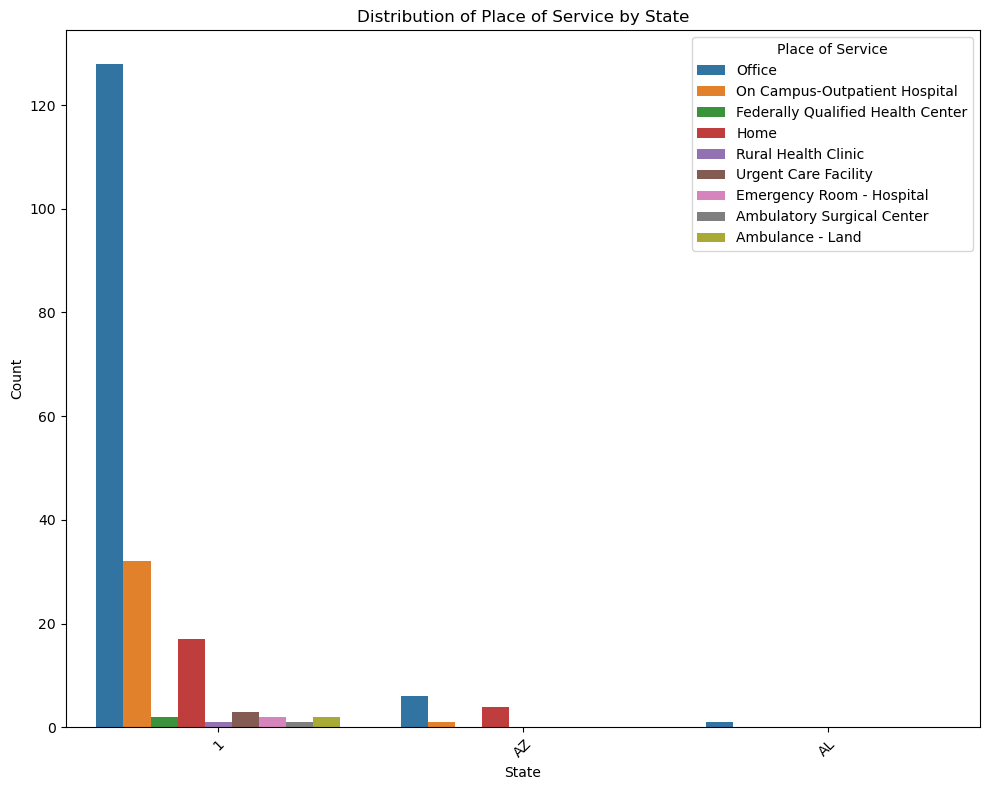

In [86]:

# Analysis 1: Distribution of `place_of_service` Across Different States
plt.figure(figsize=(10, 8))
sns.countplot(data=filtered_oz, x='patient_state', hue='place_of_service')
plt.title('Distribution of Place of Service by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Place of Service', loc='upper right')
plt.tight_layout()
plt.show()






Distribution of Place of Service by State:

The vast majority of services occur in an "Office" setting across all displayed states.
Other places of service like "On Campus-Outpatient Hospital" and "Federally Qualified Health Center" have a much lower frequency.
This suggests that for this treatment or service, outpatient settings are preferred or most accessible.

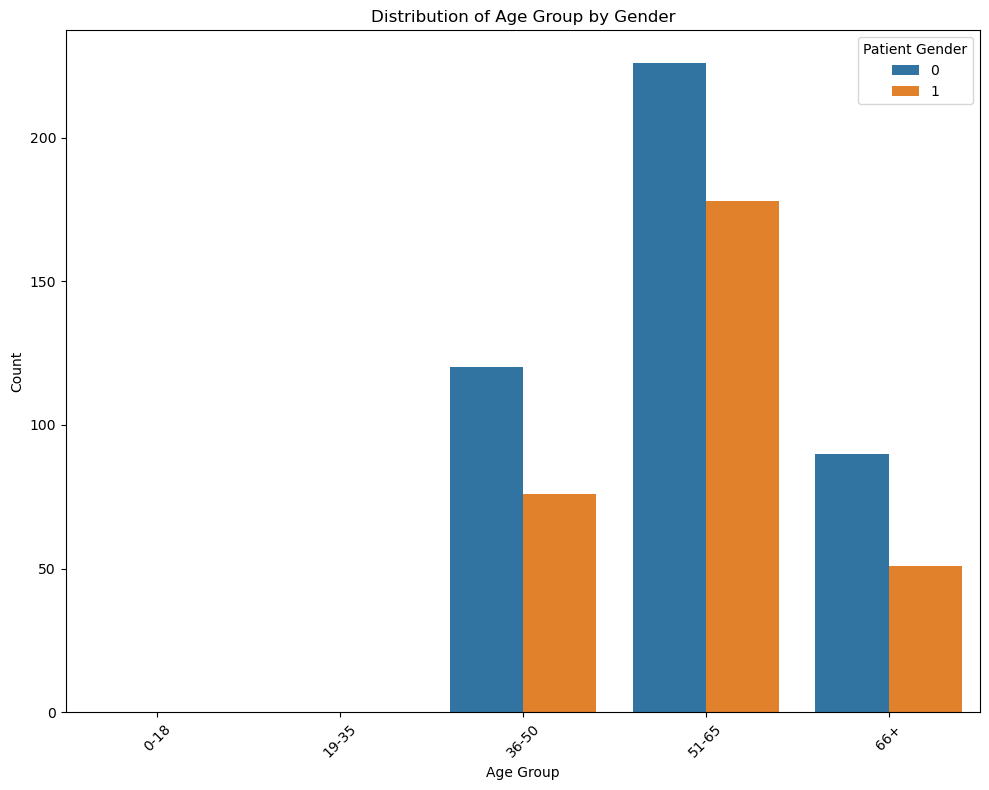

In [89]:
# Analysis 2: 
# First, categorize 'patient_age' into age groups. 
filtered_oz['age_group'] = pd.cut(filtered_oz['patient_age'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '66+'])
plt.figure(figsize=(10, 8))
sns.countplot(data=filtered_oz, x='age_group', hue='patient_gender')
plt.title('Distribution of Age Group by Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Patient Gender')
plt.tight_layout()
plt.show()


Distribution of Age Group by Gender:

The age group "51-65" has the highest count for both genders, indicating it's the most common age range for patients receiving services.
Gender "0" (female) and gender "1" (male) are both most prevalent in the "51-65" age group, but gender "0" has a slightly higher representation in the "36-50" and "66+" groups.

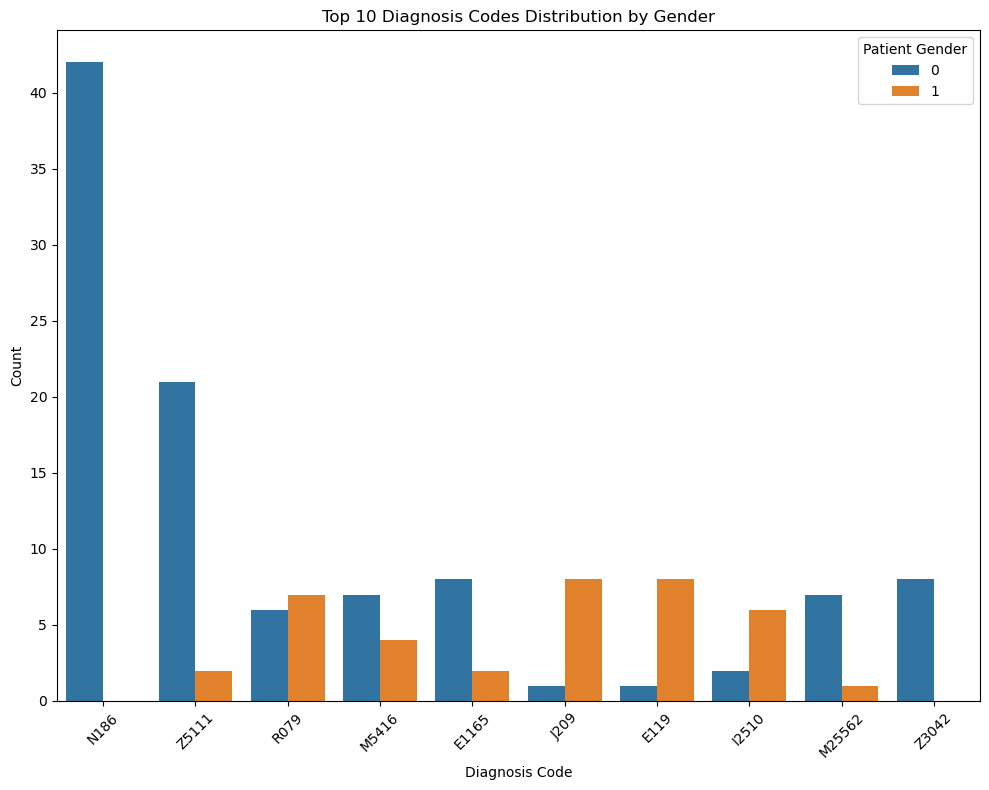

In [85]:

# Analysis 3: Diagnosis Code Analysis (Simplified example using `diag_1`)
# For a more detailed analysis, we consider using diag_list or aggregating across diag_1, diag_2, etc.
plt.figure(figsize=(10, 8))
sns.countplot(data=filtered_oz, x='diag_1', hue='patient_gender', order=filtered_oz['diag_1'].value_counts().iloc[:10].index)
plt.title('Top 10 Diagnosis Codes Distribution by Gender')
plt.xlabel('Diagnosis Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Patient Gender')
plt.tight_layout()
plt.show()


Top 10 Diagnosis Codes Distribution by Gender:

The diagnosis code "M186" has the highest count, significantly more for gender "0" than gender "1".
Other diagnosis codes like "Z5111" and "R079" appear less frequently and have a more balanced distribution between genders.
This could indicate that the condition corresponding to "M186" is either more prevalent or more often diagnosed in patients of gender "0".

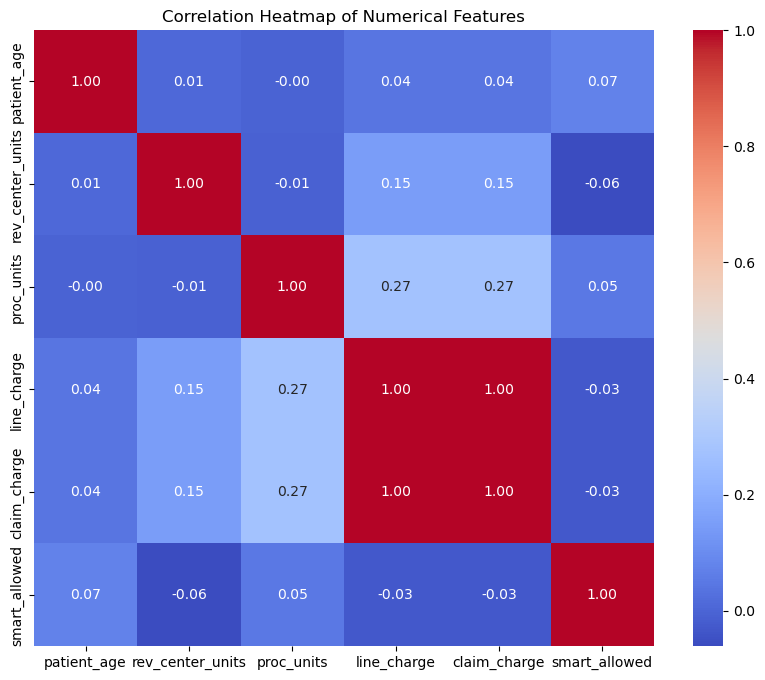

In [79]:
# Select numerical columns for correlation analysis
numerical_cols = ['patient_age', 'rev_center_units', 'proc_units', 'line_charge', 'claim_charge', 'smart_allowed']
corr_matrix = filtered_oz[numerical_cols].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


The heatmap analysis indicates minimal interrelation among most numerical variables related to the Ozempic dataset. A notable exception is a strong positive link between line charges and claim charges, likely due to their direct association with service costs. Furthermore, the number of procedure units performed shows a moderate positive relationship with both line and claim charges, suggesting an increase in charges with more procedure units. This could reflect the dosage and frequency of Ozempic administration impacting overall treatment costs.

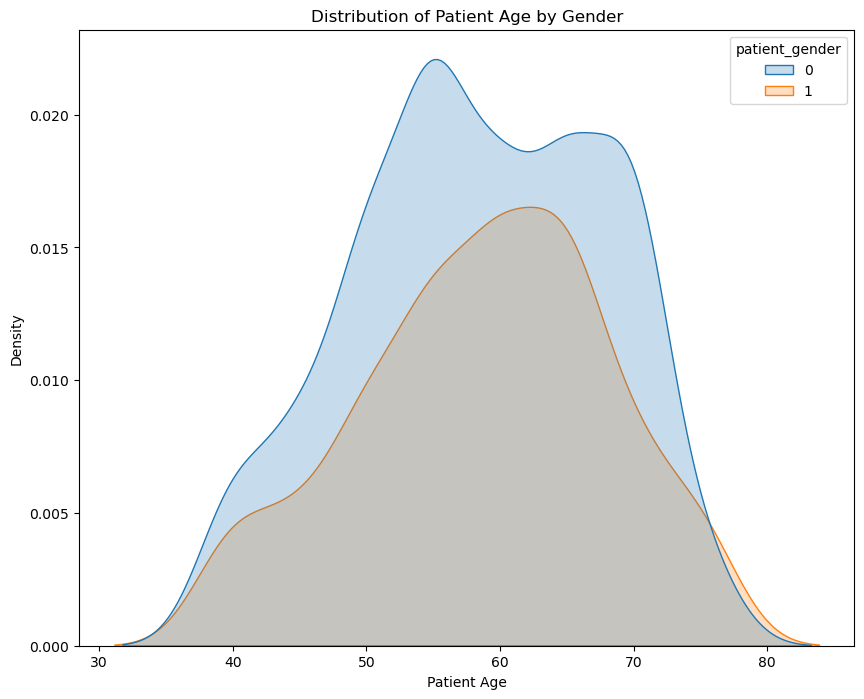

In [80]:
plt.figure(figsize=(10, 8))
sns.kdeplot(data=filtered_oz, x='patient_age', hue='patient_gender', fill=True)
plt.title('Distribution of Patient Age by Gender')
plt.xlabel('Patient Age')
plt.ylabel('Density')
plt.show()


Distribution of Patient Age by Gender:

The kernel density plot shows a similar distribution of ages for both genders, with a peak around the retirement age.
Gender 0 seems to have a slightly higher density in the older age range compared to gender 1.

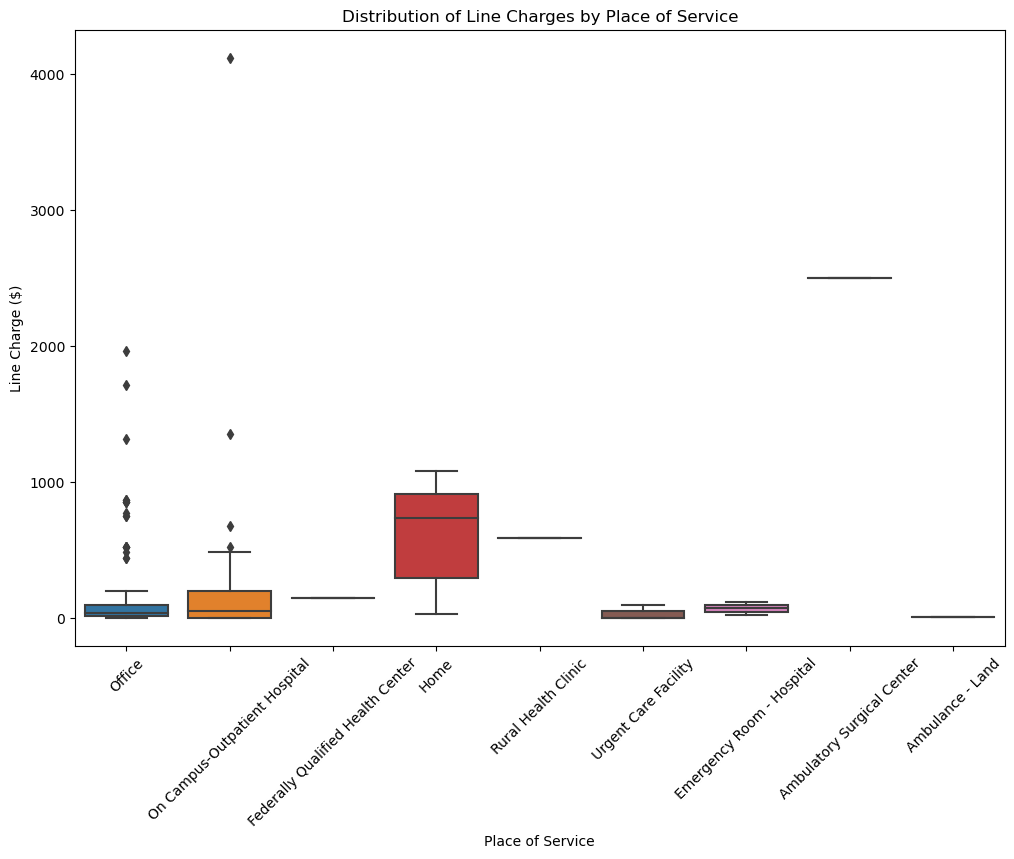

In [81]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_oz, x='place_of_service', y='line_charge')
plt.title('Distribution of Line Charges by Place of Service')
plt.xlabel('Place of Service')
plt.ylabel('Line Charge ($)')
plt.xticks(rotation=45)
plt.show()


Distribution of Line Charges by Place of Service:

The boxplot indicates that the line charges vary significantly by place of service for ozempic treatments.
'Office' has a broad range of charges but generally lower than other places like 'On Campus-Outpatient Hospital'.
There are outliers in 'Office' and 'On Campus-Outpatient Hospital' indicating some very high charges in comparison to other places of service.

C:\Users\shala\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


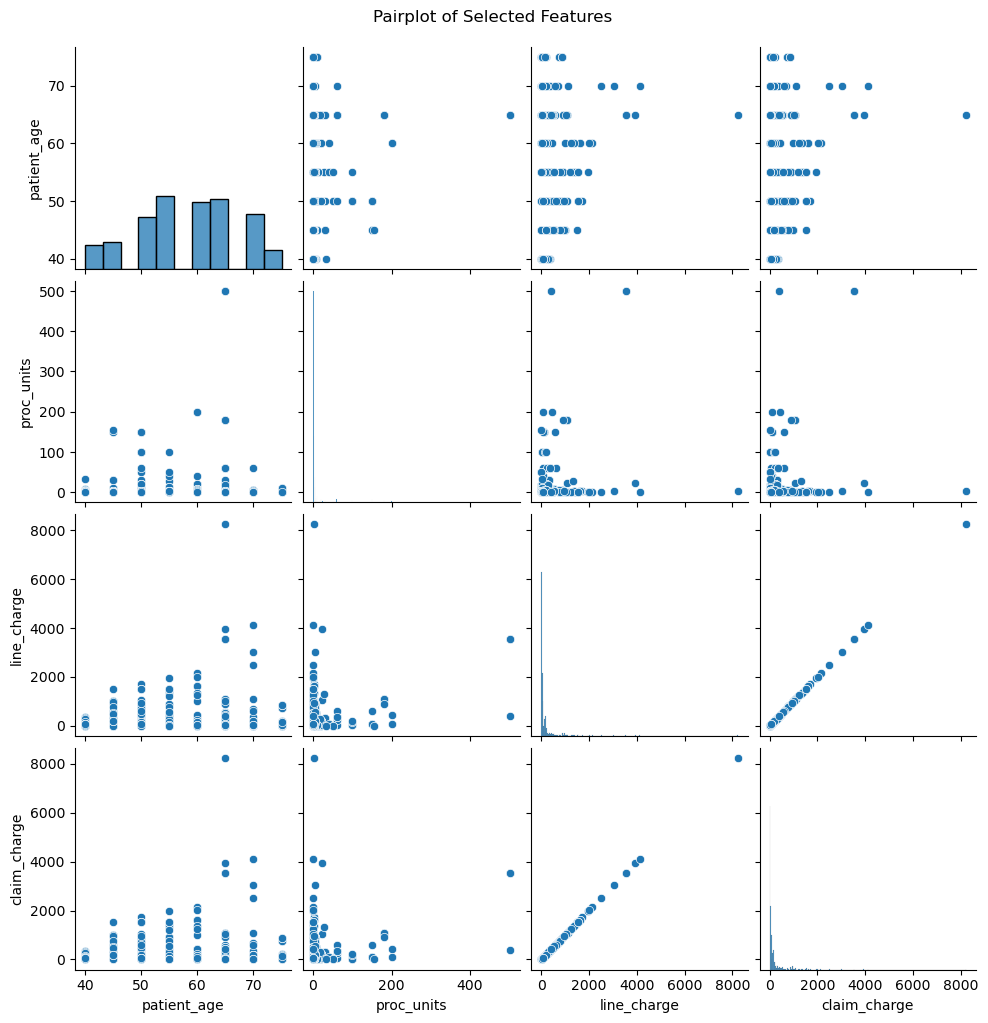

In [88]:
# Select a subset of columns for the pairplot
pairplot_cols = ['patient_age', 'proc_units', 'line_charge', 'claim_charge']
sns.pairplot(filtered_oz[pairplot_cols])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()


Pairplot of Selected Features:

The pairplot shows the distribution of individual features along the diagonal and the relationship between pairs of features in the off-diagonals.
The relationship between line_charge and claim_charge is linear, which is consistent with the strong correlation indicated in the heatmap.
Age doesn't seem to have a clear linear relationship with charges or procedure units.

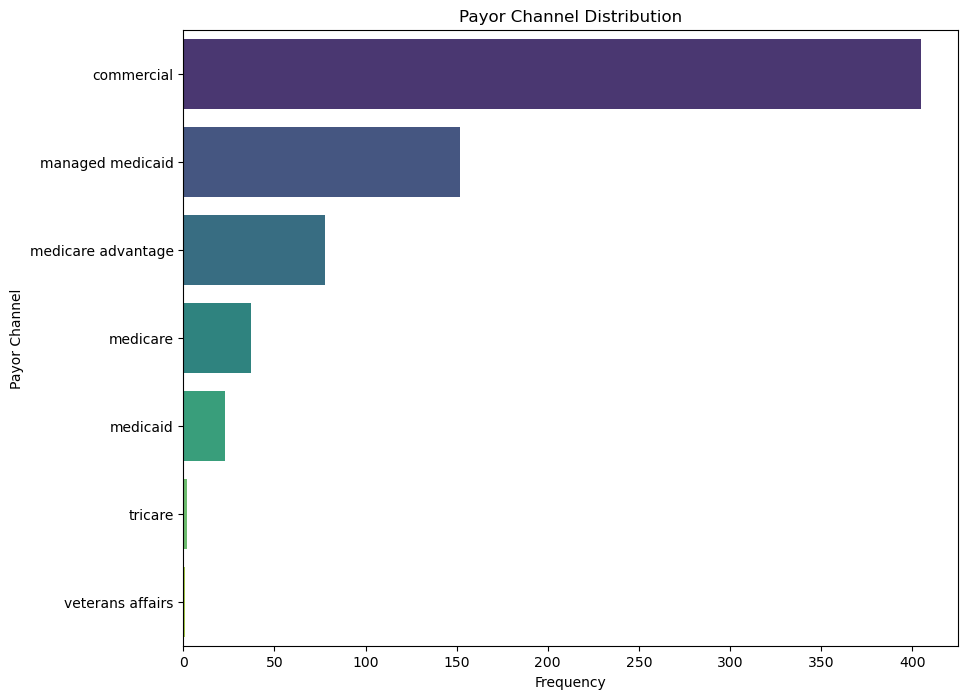

In [91]:
# Payor Channel Distribution
plt.figure(figsize=(10, 8))
sns.countplot(y='payor_channel', data=filtered_oz, order = filtered_oz['payor_channel'].value_counts().index, palette='viridis')
plt.title('Payor Channel Distribution')
plt.xlabel('Frequency')
plt.ylabel('Payor Channel')
plt.show()

The bar chart shows that private health insurance ("commercial") is the most common payor channel for Ozempic treatments, followed by "Managed Medicaid" and "Medicare Advantage." Government-funded programs like traditional "Medicare" and "Medicaid" are also used, but less frequently. "Tricare" and "Veterans Affairs" are the least common payor channels in the dataset.